In [244]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [245]:
data = pd.read_csv(r"learningSet.txt")
data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


#### Check for null values in all the columns

In [246]:
data.isna().sum()
# most columns might have missing values, if we drop NAs, we are going to remove basically all rows
# so an option is to *remove the columns* with the most missing values

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
CLUSTER2    132
GEOCODE2    132
Length: 481, dtype: int64

#### Identify columns that over 85% missing values

In [247]:
null_df = data.isna().sum()/len(data)
null_df
# we need to stablish a percentage of NAs to drop columns or not

ODATEDW     0.000000
OSOURCE     0.000000
TCODE       0.000000
STATE       0.000000
ZIP         0.000000
              ...   
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
CLUSTER2    0.001383
GEOCODE2    0.001383
Length: 481, dtype: float64

In [248]:
null_df = pd.DataFrame(null_df).reset_index()
null_df.columns = ['column_names','percentage_of_nulls']
null_df

,column_names,percentage_of_nulls
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [249]:
null_df = null_df.sort_values(by = 'percentage_of_nulls', ascending = False )
null_df

,column_names,percentage_of_nulls
414,RDATE_5,0.999906
436,RAMNT_5,0.999906
412,RDATE_3,0.997464
434,RAMNT_3,0.997464
413,RDATE_4,0.997055
...,...,...
168,ETHC3,0.000000
167,ETHC2,0.000000
166,ETHC1,0.000000
165,HHD12,0.000000


In [250]:
threshold = 0.85

condition = null_df['percentage_of_nulls'] > threshold
columns_above_threshold = null_df[condition]
columns_above_threshold

,column_names,percentage_of_nulls
414,RDATE_5,0.999906
436,RAMNT_5,0.999906
412,RDATE_3,0.997464
434,RAMNT_3,0.997464
413,RDATE_4,0.997055
435,RAMNT_4,0.997055
437,RAMNT_6,0.991867
415,RDATE_6,0.991867
446,RAMNT_15,0.923888
424,RDATE_15,0.923888


Remove those columns from the dataframe

In [251]:
drop_column_list = list(columns_above_threshold['column_names'])
data = data.drop(columns = drop_column_list)

In [252]:
data
# dropped from 481 to 456 columns

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


#### Categorical columns

In [253]:
categorical_columns = data.select_dtypes(exclude=['number']).columns.tolist()
categorical_columns

['OSOURCE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'CLUSTER',
 'AGEFLAG',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'GENDER',
 'DATASRCE',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'RFA_2R',
 'RFA_2A',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'GEOCODE2']

Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

OSOURCE - symbol definitions not provided, too many categories

ZIP CODE - we are including state already

In [254]:
drop_list = []
drop_list.append('OSOURCE')
drop_list.append('ZIP')
data.drop(columns=drop_list, inplace=True)

#### Reduce the number of categories in the column GENDER. 

The column should only have either "M" for males, "F" for females, and "other" for all the rest.

In [255]:
print (data['GENDER'].value_counts())
print (data['GENDER'].isna().sum())

GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64
0


In [256]:
data['GENDER'] = data['GENDER'].fillna('F')
data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'other')

In [257]:
data['GENDER'].value_counts()

GENDER
F        51277
M        39094
other     5041
Name: count, dtype: int64

#### Numerical columns

In [258]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['ODATEDW',
 'TCODE',
 'DOB',
 'AGE',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'WEALTH2',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW1',
 'DW2',
 'DW3',
 'DW4',
 'DW5

#### Clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

#### GEOCODE2

In [259]:
print (data['GEOCODE2'].value_counts())
print (data['GEOCODE2'].dtype)
print (data['GEOCODE2'].isna().sum())

GEOCODE2
A    34484
B    28505
D    16580
C    15524
       187
Name: count, dtype: int64
object
132


In [260]:
data = data[data['GEOCODE2'].notna()]
data['GEOCODE2'].replace(' ', 'A', inplace = True)

In [261]:
print (data['GEOCODE2'].value_counts())
# GROUP BASED IMPUTATION
# dropped NAs and replaced spaces by category A which is the MODE VALUE

GEOCODE2
A    34671
B    28505
D    16580
C    15524
Name: count, dtype: int64


#### WEALTH1

In [262]:
print (data['WEALTH1'].value_counts())
print (data['WEALTH1'].dtype)
print (data['WEALTH1'].isna().sum())

WEALTH1
9.0    7580
8.0    6785
7.0    6196
6.0    5823
5.0    5277
4.0    4808
3.0    4233
2.0    4083
1.0    3452
0.0    2411
Name: count, dtype: int64
float64
44632


In [263]:
null_df.loc[null_df['column_names'] == 'WEALTH1']
# 47% of missing values

,column_names,percentage_of_nulls
26,WEALTH1,0.46883


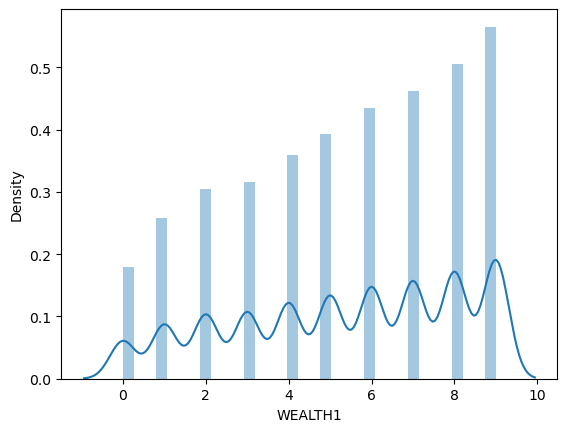

In [264]:
sns.distplot(data['WEALTH1'])
plt.show()

In [265]:
# PROPORTIONAL IMPUTATION TECHNIQUE

# Calculate the proportion of each unique value in the non-null data
value_counts = data['WEALTH1'].value_counts(normalize=True)
print("Proportion of each unique value in WEALTH1:")
print(value_counts)

# Create a list of values to fill the missing entries, based on these proportions
fill_values = np.random.choice(value_counts.index, size=data['WEALTH1'].isnull().sum(), p=value_counts.values)

# Fill the missing values with these proportional values
data.loc[data['WEALTH1'].isnull(), 'WEALTH1'] = fill_values

# Check the result
print("\nFilled missing values in WEALTH1:")
print(data['WEALTH1'].value_counts(normalize=True))
print("Null values: ", (data['WEALTH1'].isnull().sum()))

Proportion of each unique value in WEALTH1:
WEALTH1
9.0    0.149660
8.0    0.133964
7.0    0.122335
6.0    0.114970
5.0    0.104190
4.0    0.094930
3.0    0.083577
2.0    0.080615
1.0    0.068157
0.0    0.047603
Name: proportion, dtype: float64

Filled missing values in WEALTH1:
WEALTH1
9.0    0.148688
8.0    0.133249
7.0    0.121505
6.0    0.114788
5.0    0.104628
4.0    0.095476
3.0    0.084488
2.0    0.081035
1.0    0.068052
0.0    0.048090
Name: proportion, dtype: float64
Null values:  0


#### ADI

In [266]:
print (data['ADI'].value_counts())
print (data['ADI'].dtype)
print (data['ADI'].isna().sum())
# some values have very low counts

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 204, dtype: int64
float64
0


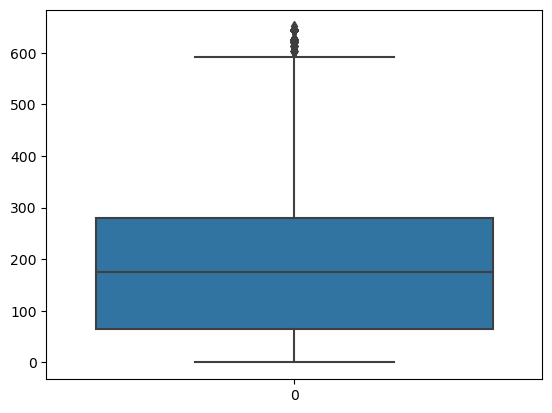

In [267]:
sns.boxplot(data['ADI'])
plt.show()

In [268]:
data['ADI'].describe()

count    95280.000000
mean       187.356402
std        137.019184
min          0.000000
25%         65.000000
50%        175.000000
75%        279.000000
max        651.000000
Name: ADI, dtype: float64

In [269]:
# GROUP VALUES AND ASSIGN BINS FOR THE DISTRIBUTION

min_val = data['ADI'].min()
Q1 = data['ADI'].quantile(0.25)
Q2 = data['ADI'].median()
Q3 = data['ADI'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
max_val = data['ADI'].max()

print(f"min: {min_val}, Q1: {Q1}, Q2: {Q2}, Q3: {Q3}, Upper Bound: {upper_bound}, max: {max_val}")

min: 0.0, Q1: 65.0, Q2: 175.0, Q3: 279.0, Upper Bound: 600.0, max: 651.0


In [270]:
# Define bins and labels
bins = [min_val, Q1, Q2, Q3, upper_bound, max_val]  
labels = ['Lower Bound', 'Q1', 'Q3', 'Upper Bound', 'Outliers']  

# Create a new column with the binned ranges
data['ADI_bin'] = pd.cut(data['ADI'], bins=bins, labels=labels, include_lowest=True)

# Group by the new 'ADI_bin' column
grouped = data.groupby('ADI_bin')

# Get counts for each group
print("Counts in each group:")
print(grouped.size())
print()

Counts in each group:
ADI_bin
Lower Bound    24122
Q1             23617
Q3             24093
Upper Bound    22840
Outliers         608
dtype: int64



In [271]:
# Define the ordinal encoding for each variable
coverage_mapping = {'Lower Bound': 0, 'Q1': 1, 'Q3': 3, 'Upper Bound': 4, 'Outliers': 5}

# Apply ordinal encoding with the custom mappings
data['ADI'] = data['ADI_bin'].map(coverage_mapping)

# Drop the 'ADI_bin' column if no longer needed
data.drop('ADI_bin', axis=1, inplace=True)
data['ADI']

0        3
1        0
2        4
3        1
4        1
        ..
95407    0
95408    3
95409    0
95410    0
95411    4
Name: ADI, Length: 95280, dtype: category
Categories (5, int64): [0 < 1 < 3 < 4 < 5]

#### DMA

In [272]:
print (data['DMA'].value_counts())
print (data['DMA'].dtype)
print (data['DMA'].isna().sum())
# some values have very low counts

DMA
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 206, dtype: int64
float64
0


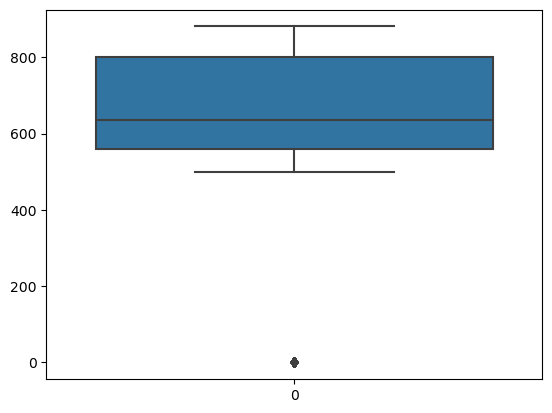

In [273]:
sns.boxplot(data['DMA'])
plt.show()

In [274]:
data['DMA'].describe()

count    95280.000000
mean       664.004072
std        116.363600
min          0.000000
25%        561.000000
50%        635.000000
75%        801.000000
max        881.000000
Name: DMA, dtype: float64

In [275]:
# GROUP VALUES AND ASSIGN BINS FOR THE DISTRIBUTION

# Calculate quantiles and IQR for the DMA column
min_val_dma = data['DMA'].min()
Q1_dma = data['DMA'].quantile(0.25)
Q2_dma = data['DMA'].median()
Q3_dma = data['DMA'].quantile(0.75)
IQR_dma = Q3_dma - Q1_dma
max_val_dma = data['DMA'].max()
lower_bound_dma = Q1_dma - 1.5 * IQR_dma

print(f"min: {min_val_dma}, Lower Bound: {lower_bound_dma}, Q1: {Q1_dma}, Q2: {Q2_dma}, Q3: {Q3_dma}, max: {max_val_dma}")

min: 0.0, Lower Bound: 201.0, Q1: 561.0, Q2: 635.0, Q3: 801.0, max: 881.0


In [276]:
# Define bins and labels
bins_dma = [min_val_dma, lower_bound_dma, Q1_dma, Q2_dma, Q3_dma, max_val_dma]  
labels_dma = ['Outliers','Lower Bound', 'Q1', 'Q3', 'Upper Bound']  

# Create a new column with the binned ranges
data['DMA_bin'] = pd.cut(data['DMA'], bins=bins_dma, labels=labels_dma, include_lowest=True)

# Group by the new 'DMA_bin' column
grouped_dma = data.groupby('DMA_bin')

# Get counts for each group
print("Counts in each group:")
print(grouped_dma.size())
print()

Counts in each group:
DMA_bin
Outliers         187
Lower Bound    23635
Q1             24069
Q3             23907
Upper Bound    23482
dtype: int64



In [277]:
# Define the ordinal encoding for each variable
dma_mapping = {'Outliers':0, 'Lower Bound': 1, 'Q1': 2, 'Q3': 3, 'Upper Bound': 4}

# Apply ordinal encoding with the custom mappings
data['DMA'] = data['DMA_bin'].map(dma_mapping)

# Drop the 'DMA_bin' column if no longer needed
data.drop('DMA_bin', axis=1, inplace=True)
data['DMA']

0        3
1        4
2        1
3        4
4        1
        ..
95407    3
95408    2
95409    1
95410    4
95411    1
Name: DMA, Length: 95280, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

### MSA

In [278]:
print (data['MSA'].value_counts())
print (data['MSA'].dtype)
print (data['MSA'].isna().sum())
# some values have very low counts and 0 has a very high count

MSA
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 298, dtype: int64
float64
0


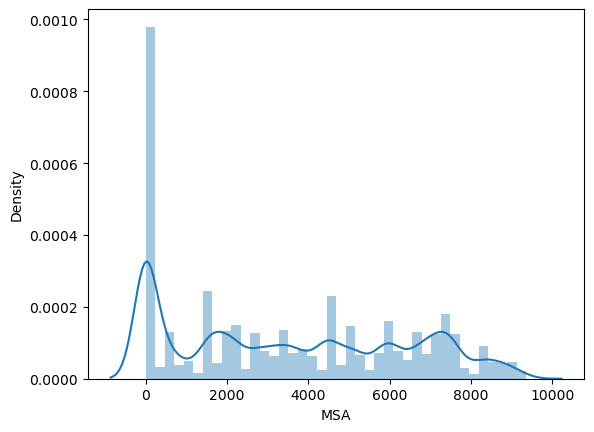

In [279]:
sns.distplot(data['MSA'])
plt.show()

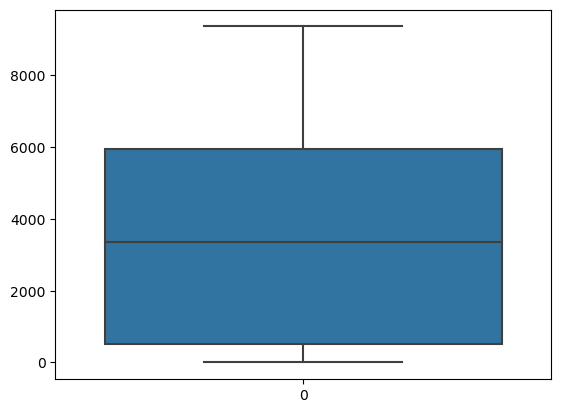

In [280]:
sns.boxplot(data['MSA'])
plt.show()

In [281]:
data['MSA'].describe()

count    95280.000000
mean      3527.744102
std       2863.904737
min          0.000000
25%        520.000000
50%       3350.000000
75%       5960.000000
max       9360.000000
Name: MSA, dtype: float64

In [285]:
# Calculate quantiles and IQR for the MSA column
min_val_msa = data['MSA'].min()
Q1_msa = data['MSA'].quantile(0.25)
Q2_msa = data['MSA'].median()
Q3_msa = data['MSA'].quantile(0.75)
IQR_msa = Q3_msa - Q1_msa
max_val_msa = data['MSA'].max()
lower_bound_msa = Q1_msa - 1.5 * IQR_msa
upper_bound_msa = Q3_msa + 1.5 * IQR_msa

print(f"min: {min_val_msa}, Q1: {Q1_msa}, Q2: {Q2_msa}, Q3: {Q3_msa}, max: {max_val_msa}")

min: 0.0, Q1: 520.0, Q2: 3350.0, Q3: 5960.0, max: 9360.0


In [287]:
# Define bins and labels
bins_msa = [min_val_msa, Q1_msa, Q2_msa, Q3_msa, max_val_msa]  
labels_msa = ['Lower Bound', 'Q1', 'Q3', 'Upper Bound']  

# Create a new column with the binned ranges
data['MSA_bin'] = pd.cut(data['MSA'], bins=bins_msa, labels=labels_msa, include_lowest=True)

# Group by the new 'DMA_bin' column
grouped_msa = data.groupby('MSA_bin')

# Get counts for each group
print("Counts in each group:")
print(grouped_msa.size())
print()

Counts in each group:
MSA_bin
Lower Bound    24487
Q1             23188
Q3             23959
Upper Bound    23646
dtype: int64



In [288]:
# Define the ordinal encoding for each variable
msa_mapping = {'Lower Bound':0, 'Q1':1, 'Q3':2, 'Upper Bound':3}

# Apply ordinal encoding with the custom mappings
data['MSA'] = data['MSA_bin'].map(msa_mapping)

# Drop the 'MSA_bin' column if no longer needed
data.drop('MSA_bin', axis=1, inplace=True)
data['MSA']

0        0
1        2
2        0
3        3
4        2
        ..
95407    0
95408    2
95409    2
95410    3
95411    3
Name: MSA, Length: 95280, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

#### Columns cleaned

In [289]:
data[['GENDER','GEOCODE2','WEALTH1','ADI','DMA','MSA']]

,GENDER,GEOCODE2,WEALTH1,ADI,DMA,MSA
0,F,C,5.0,3,3,0
1,M,A,9.0,0,4,2
2,M,C,1.0,4,1,0
3,F,C,4.0,1,4,3
4,F,A,2.0,1,1,2
...,...,...,...,...,...,...
95407,M,C,4.0,0,3,0
95408,M,A,9.0,3,2,2
95409,M,B,4.0,0,1,2
95410,F,A,8.0,0,4,3


In [290]:
data.shape

(95280, 454)

In [291]:
#data.to_csv('learningSet.csv', index=False)